In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

import sklearn
import matplotlib.pyplot as plt

In [3]:
#Accessing the data sets, we'll start with the train
train = pd.read_csv(r'C:\Users\shee\Desktop\Umoja Hack Zindi\economic-well-being-prediction-competition\Train.csv')
print(train.shape)
train.head()

(21454, 19)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [4]:
#Then the test data set
test = pd.read_csv('Test.csv')
print(test.shape)
test.head()

(7194, 18)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [5]:
ss = pd.read_csv('SampleSubmission.csv')
print(ss.shape)
ss.head()

(7194, 2)


,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


# Using Numeric Columns for our Model

In [6]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


In [7]:
from sklearn.model_selection import train_test_split

X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print(X_train.shape, X_test.shape)

(17163, 14) (4291, 14)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)
model.score(X_test, y_test) # Show a score

0.4986852042485045

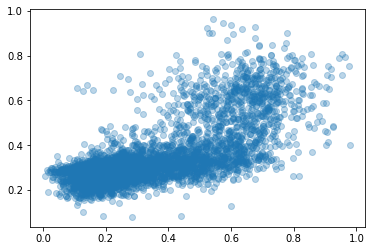

In [16]:
from matplotlib import pyplot as plt
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

In [17]:
from sklearn.metrics import mean_squared_error

# The `squared=False` bit tells this function to return the ROOT mean squared error
mean_squared_error(y_test, model.predict(X_test), squared=False)

0.1395113820419316

In [18]:
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

,ID,Target
0,ID_AAcismbB,0.073424
1,ID_AAeBMsji,0.146480
2,ID_AAjFMjzy,0.638091
3,ID_AAmMOEEC,0.272791
4,ID_ABguzDxp,0.261006


In [20]:
ss.to_csv(r'C:\Users\shee\Desktop\Umoja Hack Zindi\economic-well-being-prediction-competition\first_submission.csv', index=False)